# Chapter 3.5.1 Identity Function and Softmax

## Identity Function

항등 함수: 입력 그대로 출력

입력 신호가 그대로 출력 신호가 됨

## Softmax Function

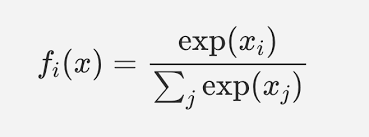

https://vitalflux.com/what-softmax-function-why-needed-machine-learning/

- exp: exponential function

- j: number of neurons of output layer

- fi(x): 그 중 kth output

softmax의 출력은 모든 입력 신호로부터 화살표를 받음

분모에서 보듯(sigma), 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받기 때문

### simple code of Softmax

In [2]:
import numpy as np

In [4]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a) # 지수 함수의 합(sigma)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [5]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## Chapter 3.5.2 Warning Point While Coding Softmax

Overflow 문제 발생 - 지수 함수의 특성: 큰 값

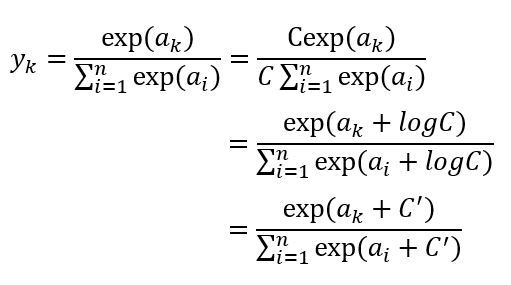

개선된 수식

- softmax의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과 바뀌지 X (log - 곱셈)

- Overflow 막을 목적으로 C'에 input 신호 중 maximum value 이용

In [6]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

<ipython-input-6-23103c906500>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
<ipython-input-6-23103c906500>:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [7]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [10]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

### Code of Improved Softmax

In [14]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## Chapter 3.5.3 More about Softmax Function

In [15]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [16]:
np.sum(y)

1.0

- softmax 함수의 출력은 0에서 1.0 사이 실수
- softmax 출력의 총합은 1
    - softmax 함수의 출력을 확률로 해석 가능
        - 통계적(확률적) 대응 가능해짐
        
- softmax 함수 사용 -> 원소의 *대소*관계 유지
    - y = exp(x): 단조 증가 함수
    
- 분류: 가장 큰 label만 인식
    - 신경망 분류 시에는 출력층의 softmax function 생략 가능